In [1]:
import common
reload(common)
from common import *
import numpy as np
log_collector = Log_collector('./test_space')
log_collector.log_dict

{}

In [7]:
a = np.asarray([[1,2],[3,4]])
print np.ndarray.tolist(a)
print np.asarray(np.ndarray.tolist(a))

[[1, 2], [3, 4]]
[[1 2]
 [3 4]]


In [6]:
import scipy.io
mat1 = {'string':'string'}
mat2 = {'list':[1,2,3]}

scipy.io.savemat('./test_space/mat1.mat',mat1)
scipy.io.savemat('./test_space/mat2.mat',mat2)

mat1 = scipy.io.loadmat('./test_space/mat1.mat')
mat2 = scipy.io.loadmat('./test_space/mat2.mat')

print mat1['string']
print mat2['list']

[u'string']
<type 'numpy.ndarray'>


In [2]:
epoch = np.asarray([1,2,3,4,5,6,7])
loss = [60,50,40,30,20,10,1]
acc = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9]
useless = [1,2,3,4,5,6,7]
np_value1 = np.asarray([[1,2],[3,4]])
np_value2 = np.asarray([[5,6],[7,8]])
log_collector.add_log('description','center loss')
log_collector.add_log('description','data:mnist')
log_collector.add_log('description','visualization')
log_collector.add_log('loss',loss)
log_collector.add_log('acc',acc)
log_collector.add_log('useless',acc)
log_collector.add_log('epoch',epoch)
log_collector.clear_log('useless')
log_collector.add_log('np',np_value1)
log_collector.add_log('np',np_value2)
log_collector.display_log()

acc: <type 'float'>
loss: <type 'int'>
description: <type 'str'>
epoch: <type 'int'>
np: <type 'list'>


In [14]:
mat_dict = scipy.io.loadmat('./test_space/description.mat')
print mat_dict
f = open('./test_space/test_dict.txt','w')
f.write(mat_dict)
f.close()

{'description': array([u'center loss'], dtype='<U11'), '__version__': '1.0', '__header__': 'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Jun 25 20:55:01 2018', '__globals__': []}


TypeError: expected a string or other character buffer object

In [3]:
#log_collector.write_log(['epoch','loss','acc'])
log_collector.write_log()

In [7]:
type([1]) is list

True

In [7]:
log_collector.log_dict

{'loss': [0, 0, 0, 1, 2, 3]}

In [1]:
import time
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data
import data
from model import *
from data import color_map
from config import Config
tic = time.time

# tf_mnist = input_data.read_data_sets('/data/mnist', one_hot=False)

# mnist.train.next_batch(batch_size
# mnist.test.images)
# mnist.test.labels)


/home/deerx/husen/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting /data/mnist/train-images-idx3-ubyte.gz
Extracting /data/mnist/train-labels-idx1-ubyte.gz
Extracting /data/mnist/t10k-images-idx3-ubyte.gz
Extracting /data/mnist/t10k-labels-idx1-ubyte.gz


In [2]:
config = Config()
config.num_epochs = 3
config.display()
log_collector = Log_collector(config.log_dir)


Configurations:
alpha                          0.5
beta                           0.5
center_dim                     2
ckpt_dir                       /data/checkpoints/center_loss/center_loss/2018-06-25-16-54-54/snapshots
ckpt_path                      /data/checkpoints/center_loss/center_loss/2018-06-25-16-54-54/snapshots/net.ckpt
data_dir                       /data/mnist
image_shape                    (28, 28)
log_dir                        /data/checkpoints/center_loss/center_loss/2018-06-25-16-54-54/log
log_path                       /data/checkpoints/center_loss/center_loss/2018-06-25-16-54-54/log/log.txt
lr                             0.01
model_dir                      /data/checkpoints/center_loss
model_name                     center_loss
num_classes                    10
num_epochs                     3
root_dir                       /data/checkpoints/center_loss/center_loss/2018-06-25-16-54-54
time_stamp                     2018-06-25-16-54-54




## Train center loss model

In [3]:
model = mnist_center_loss_model(config)

(10, 2)
conv1 : (?, 28, 28, 32) <dtype: 'float32'>
conv2 : (?, 14, 14, 64) <dtype: 'float32'>
conv3 : (?, 7, 7, 128) <dtype: 'float32'>
batch_centers : (?, 2) <dtype: 'float32'>
center_loss : (?, 2) <dtype: 'float32'>
center_loss : (?,) <dtype: 'float32'>


In [4]:

mnist = data.mnist_data(config.data_dir)

sess = tf.Session()
sess.run(tf.global_variables_initializer())



max_acc = 0.

time_log = 0.
time_ckpt = 0.
time_train = 0.
time_val = 0.

#config.update_time()
for i in range(config.num_epochs):
    t1 = tic()
    for batch_images, batch_labels in mnist.train_generator():
        result = model.train_on_batch(sess, batch_images, batch_labels)
    t2 = tic()
    time_train += (t2-t1)
        
    t1 = tic()
    val_acc = model.test_acc_on_generator(sess, mnist.val_generator())
    t2 = tic()
    time_val += (t2-t1)
    
    t1 = tic()
    log_collector.add_log('epoch', i)
    log_collector.add_log('val_acc', val_acc)
    log_collector.add_log('loss', result['loss'])
    t2 = tic()
    time_log += (t2-t1)
    
    temp_log = 'epoch:{} loss:{:8f} val_acc:{:4f}'.format(i, result['loss'],val_acc)
    print temp_log
    
    t1 = tic()
    model.saver.save(sess,join(config.ckpt_path),global_step=i)
    t2 = tic()
    time_ckpt += (t2-t1)
    
    if val_acc > max_acc:
        model.saver.save(sess,join(config.ckpt_path))

time_used = t2 - t1


Extracting /data/mnist/train-images-idx3-ubyte.gz
Extracting /data/mnist/train-labels-idx1-ubyte.gz
Extracting /data/mnist/t10k-images-idx3-ubyte.gz
Extracting /data/mnist/t10k-labels-idx1-ubyte.gz
epoch:0 loss:0.822057 val_acc:0.949000
epoch:1 loss:0.292164 val_acc:0.970800
epoch:2 loss:0.294844 val_acc:0.980000


In [6]:
print "time_train",time_train
print "time_val",time_val
print "time_log",time_log
print "time_ckpt",time_ckpt

time_train 240.55041337
time_val 1.44945025444
time_log 7.58171081543e-05
time_ckpt 0.855117082596


In [7]:
log_collector.write_log()

In [8]:
log_collector.display_log()
log_collector.log_dir

loss: (3,)
epoch: (3,)
val_acc: (3,)


'/data/checkpoints/center_loss/center_loss/2018-06-25-16-54-54/log'

In [3]:
acc = model.test_acc_on_generator(sess, val_generator)
print 'acc: ',acc

acc:  0.9898


In [9]:
restore = True
if restore:
    model.saver.restore(sess, config.ckpt_path)
    
val_generator = mnist.val_generator()
features, labels = model.compute_features_on_generator(sess, val_generator, num_batches=20)


INFO:tensorflow:Restoring parameters from /data/checkpoints/center_loss/center_loss/2018-06-25-16-54-54/snapshots/net.ckpt


(1000, 2)
(1000,)


/home/deerx/husen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
/home/deerx/husen/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/deerx/husen/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


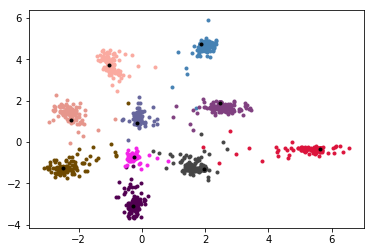

In [10]:
import matplotlib.pyplot as plt
print features.shape
print labels.shape

plt.ion()
plt.figure()
plt.hold(True)
for i in range(model.num_classes):
    x = features[labels==i,0]
    y = features[labels==i,1]
    plt.plot(x,y,'.',color=color_map[i])
    plt.plot(model.np_centers[i,0],model.np_centers[i,1],'o',color=color_map[i])
    plt.plot(model.np_centers[i,0],model.np_centers[i,1],'.',color='k')